<a href="https://colab.research.google.com/github/rrizwan98/Amazon_data/blob/master/Face_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name='/content/drive/MyDrive/face expression dataset.zip'
with ZipFile (file_name,'r')as zip:
  zip.extractall()
  
  print('raza') 

raza


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [ ]:
#types of classes batch size and img_rows, img_cols
nb_classes         = 7
img_rows, img_cols = 150, 150
batch_size         = 32

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#Faltten the model
model.add(Flatten())
    
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
    
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes , activation='softmax'))

model.compile(
  optimizer = Adam(lr=0.0001 , decay=1e-6), 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy']
)


In [ ]:

# Creating an instance of the model and printing the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
activation_6 (Activation)    (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 128)      

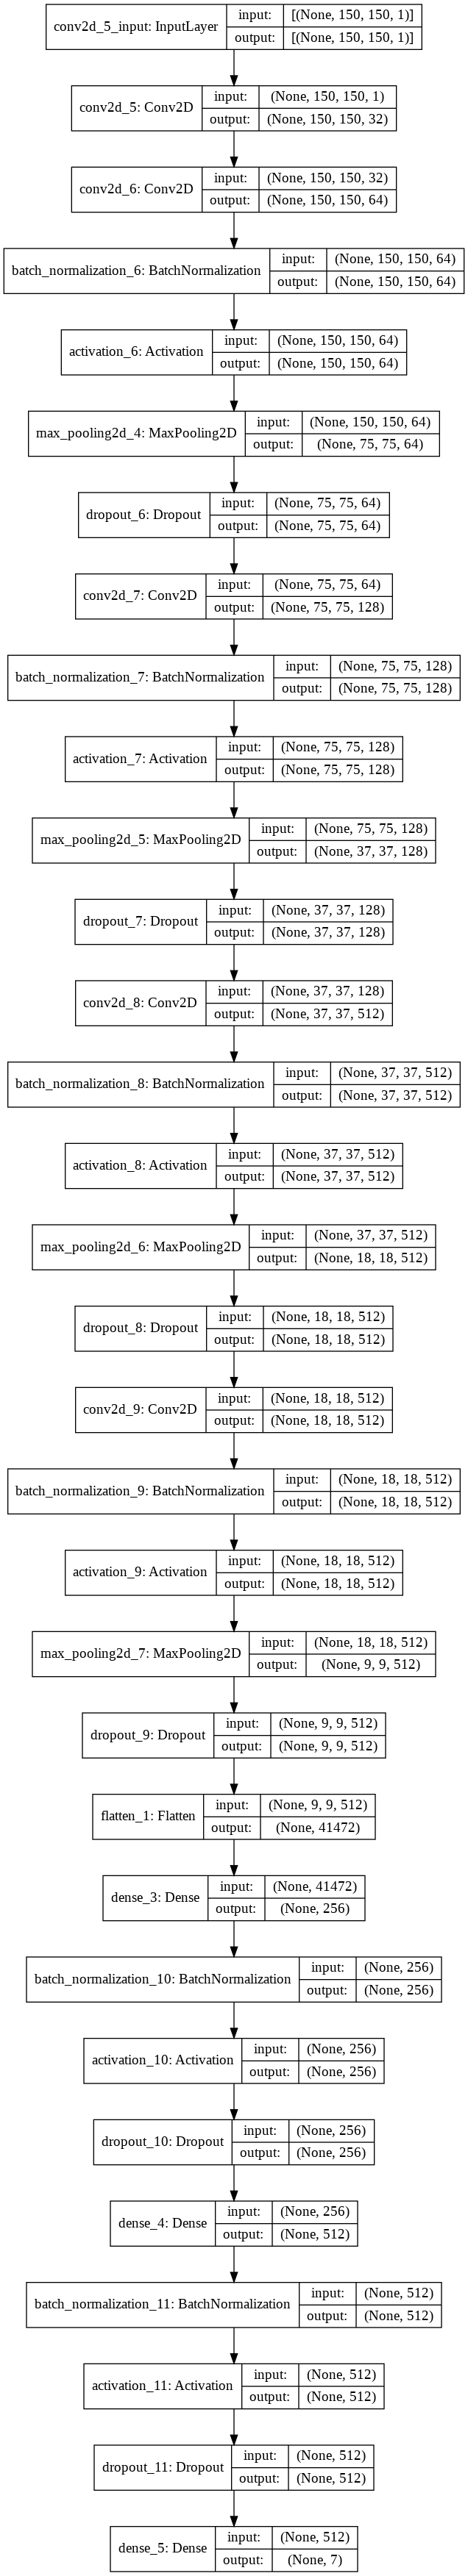

In [ ]:
plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('/content/train',
                                              color_mode  = 'grayscale',
                                              target_size=(img_rows, img_cols),
                                              batch_size=batch_size,
                                              class_mode="sparse")

test_set = train_datagen.flow_from_directory('/content/test',
                                             color_mode  = 'grayscale',
                                             target_size=(img_rows, img_cols),
                                             batch_size=batch_size,
                                             class_mode="sparse")



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
chk_path = 'ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(
    filepath       = chk_path,
    save_best_only = True,
    verbose        = 1,
    mode           = 'min',
    moniter        = 'val_loss'
)

earlystop = EarlyStopping(
    monitor              = 'val_loss', 
    min_delta            = 0, 
    patience             = 3, 
    verbose              = 1, 
    restore_best_weights = True
)
                        
reduce_lr = ReduceLROnPlateau(
    monitor   = 'val_loss', 
    factor    = 0.2, 
    patience  = 6, 
    verbose   = 1, 
    min_delta = 0.0001
)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]


In [ ]:
steps_per_epoch  = train_set.n // train_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = model.fit(x= train_set,                 
                validation_data  = test_set, 
                epochs           = 40, 
                callbacks        = callbacks, 
                steps_per_epoch  = steps_per_epoch, 
                validation_steps = validation_steps)



Epoch 1/40
897/897 [==============================] - 190s 202ms/step - loss: 8.7961 - accuracy: 0.1920 - val_loss: 6.1207 - val_accuracy: 0.1751

Epoch 00001: val_loss improved from inf to 6.12066, saving model to ferNet.h5
Epoch 2/40
897/897 [==============================] - 181s 201ms/step - loss: 5.6335 - accuracy: 0.2382 - val_loss: 3.9192 - val_accuracy: 0.2847

Epoch 00002: val_loss improved from 6.12066 to 3.91923, saving model to ferNet.h5
Epoch 3/40
897/897 [==============================] - 181s 202ms/step - loss: 3.5951 - accuracy: 0.2967 - val_loss: 2.8401 - val_accuracy: 0.2725

Epoch 00003: val_loss improved from 3.91923 to 2.84013, saving model to ferNet.h5
Epoch 4/40
897/897 [==============================] - 181s 202ms/step - loss: 2.6476 - accuracy: 0.3312 - val_loss: 2.4437 - val_accuracy: 0.2467

Epoch 00004: val_loss improved from 2.84013 to 2.44371, saving model to ferNet.h5
Epoch 5/40
897/897 [==============================] - 181s 202ms/step - loss: 2.2104 - a

In [ ]:
train_loss, train_accu = model.evaluate(train_set)
test_loss, test_accu = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

225/225 [==============================] - 12s 53ms/step - loss: 1.2500 - accuracy: 0.6293
final train accuracy = 87.69 , validation accuracy = 62.93


<Figure size 432x288 with 0 Axes>

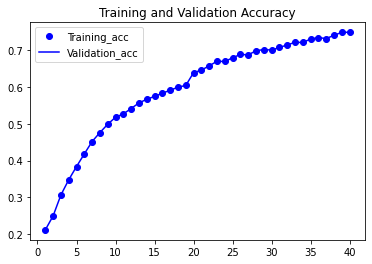

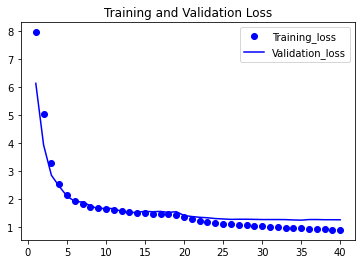

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs=range(1,len(acc) +1)

plt.plot(epochs , acc ,'bo' ,label='Training_acc')
plt.plot(epochs , acc ,'b' ,label='Validation_acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs ,loss ,'bo' ,label='Training_loss')
plt.plot(epochs , val_loss ,'b',label='Validation_loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.figure()

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [ ]:
face_classifier = cv2.CascadeClassifier(r'C:\Python37\Projects\Live Project\haarcascade_frontalface_default.xml')
classifier =load_model(r'C:\Python37\Projects\Live Project\Emotion_little_vgg.h5')

class_labels = ['Angry','disgust','fear','Happy','Neutral','Sad','Surprise',]

cap = cv2.VideoCapture(0)

OSError: ignored

In [ ]:
while True:
    # Grab a single frame of video
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    # rect,face,image = face_detector(frame)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()